In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('iris.csv')

# View the first few rows
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [17]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df[['sepal_length', 'sepal_width', 'petal_length']]  # Replace with your feature column names
y = df['petal_width']  # Replace with your target column name

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.054333333333333324


In [22]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = knn.predict(X_test)

# Use appropriate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.054333333333333324
R-squared: 0.9145239385411387


In [23]:
from sklearn.metrics import mean_squared_error

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.054333333333333324


In [25]:
# Try different values of k
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k) # Changed from KNeighborsClassifier to KNeighborsRegressor
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test) # This will now calculate the R^2 score, suitable for regression
    print(f"k={k}, R-squared={score}") # Changed 'Accuracy' to 'R-squared'

k=1, R-squared=0.8804383925606112
k=2, R-squared=0.9107220891817721
k=3, R-squared=0.9145239385411387
k=4, R-squared=0.9142945165970389
k=5, R-squared=0.9253474103724939
k=6, R-squared=0.9226520302749568
k=7, R-squared=0.9294530866236617
k=8, R-squared=0.9228322903738923
k=9, R-squared=0.9190945739565712
k=10, R-squared=0.9182943243196001


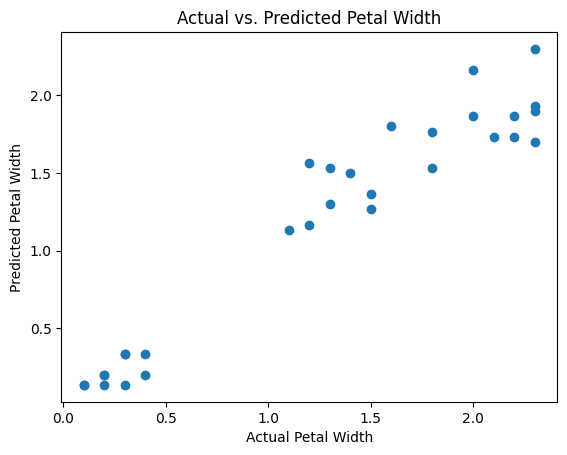

In [28]:
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Remove this import as it's not needed

# Assuming 'knn' is your KNeighborsRegressor object

# Instead of confusion matrix, visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petal Width")
plt.ylabel("Predicted Petal Width")
plt.title("Actual vs. Predicted Petal Width")
plt.show()